**Using EpidemicKabu to estimate the size of the epidemic waves**
In this notebook we create a database with date of report and an indicator of incident cases by date. Then, we use the library to estimate waves using the indicator and the dates as the main input. Finally, we create a database to estimate the waves size using the output database of the library.

***1. Building the database with the indicator:*** The indicator is estimated dividing each daily case between the total population by year by country and multiplying by 100.

In [1]:
import pandas as pd
import numpy as np

    The database with the daily cases by country

In [3]:
#The database with the daily cases by country
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/uncoverCountries.csv")
database = database[["Date_reported","Country_code","Country","New_cases"]] 
database.head()

,Date_reported,Country_code,Country,New_cases
0,2020-01-03,BE,Belgium,0
1,2020-01-04,BE,Belgium,0
2,2020-01-05,BE,Belgium,0
3,2020-01-06,BE,Belgium,0
4,2020-01-07,BE,Belgium,0


In [4]:
#Building the year coulmn for each Date_reported
database["Year"] = database.apply(lambda x : x["Date_reported"][0:4], axis = 1)
database.head()

,Date_reported,Country_code,Country,New_cases,Year
0,2020-01-03,BE,Belgium,0,2020
1,2020-01-04,BE,Belgium,0,2020
2,2020-01-05,BE,Belgium,0,2020
3,2020-01-06,BE,Belgium,0,2020
4,2020-01-07,BE,Belgium,0,2020


    Uploading the database with the total population by year by country from:
    https://ourworldindata.org/population-sources


In [ ]:
databaseCPowid= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/populationOWID.csv").reset_index(drop=True)
databaseCPowid.head()

In [ ]:
databaseCPowid["Population"]=databaseCPowid['Population (future projections)'].combine_first(databaseCPowid['Population (historical estimates)'])
databaseCPowid = databaseCPowid.rename(columns = {"Entity":"Country"})
databaseCPowid = databaseCPowid[["Country","Year","Population"]]
databaseCPowid.head()

In [ ]:
databaseCPowid=databaseCPowid[databaseCPowid["Year"].between(2020,2022,inclusive=True)]

In [ ]:
databaseCPowid["Year"]=databaseCPowid["Year"].astype(str)

In [ ]:
databaseCPowid.shape

In [ ]:
# Homogenization of the countries names in such way the the database and databaseCPowid could be joined
np.setdiff1d(np.array(database["Country"].unique()),np.array(databaseCPowid["Country"].unique()))

In [ ]:
def looking (pattern):
    return list(filter(lambda x : pattern in x, databaseCPowid["Country"].unique()))

In [ ]:
looking("orea")

In [ ]:
looking("ingdom")

In [ ]:
looking("rkey")

In [ ]:
looking("merica")

In [ ]:
looking("tates")

In [ ]:
old_strings = ['South Korea', 'United Kingdom', 'Turkey','United States']
new_strings = ['Republic of Korea', 'The United Kingdom', 'Türkiye',
       'United States of America']

In [ ]:
databaseCPowid["Country"] = databaseCPowid["Country"].replace(old_strings,new_strings)
databaseCPowid.shape

In [ ]:
np.setdiff1d(np.array(database["Country"].unique()),np.array(databaseCPowid["Country"].unique()))

    The complete database

In [ ]:
#The complete database with the population by year by country by each date_reported and the indicator
complete = pd.merge(database,databaseCPowid, on = ["Country","Year"])
complete.head(4)

In [ ]:
complete.shape

In [ ]:
complete.Date_reported = pd.to_datetime(complete.Date_reported,errors = "coerce")
complete["Indicator"] = (complete["New_cases"]/complete["Population"])*100
complete.head(4)


In [ ]:
complete.to_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/uncoverCountriesIndicator.csv")
complete.drop_duplicates(["Year","Population"])
complete.head(4)

***2. Using EpidemicKabu library:*** Using the date and the indicator of incident cases to estiamte the waves

In [2]:
import epidemickabu as ek

In [5]:
dataframe= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/uncoverCountriesIndicator.csv")
datesName = "Date_reported"
casesName = "Indicator"
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/configurationFile.csv")

In [6]:
len(dataframe["Date_reported"])

14985

In [ ]:
# The dataframe with the columns dates and cases by date
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/uncoverCountries.csv")
database = database[["Date_reported","Country_code","Country","New_cases"]]
databaseCOLOMBIA=database[database["Country_code"]=="GB"]
datesName = "Date_reported"
casesName = "New_cases"
databaseCOLOMBIA.head(3)

# The next dataframe has the kernel values for the countries
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/configurationFile.csv")
configFile.head(3)

# the names of the output files
plotNameW = "Epidemic_curve_UK_W_exploringL"
dfNameW = "Epidemic_curve_UK_W_exploringL"
plotNamePV = "Epidemic_curve_UK_PV_exploringL"
dfNamePV = "Epidemic_curve_UK_PV_exploringL"

#Be sure to create the "./plots/" and "./dataframes" folder in the same folder in which you
#are running the code, or define the variables to set an specific directory
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/dataframes/"

# The threshols is optional by default is zero. We declarate them but ...
thresholdW = 0
thresholdPV = 0

example = ek.waves(databaseCOLOMBIA,datesName,casesName,[configFile,"Code","CO","kernel1"],[configFile,"Code","CO","Kernel2"],plotNameW,dfNameW,outFolderPlot,outFolderDF)
example.run()

In [7]:
def kabuWavesF (database,datesName,casesName,value,plotName,dfName):
    test = ek.waves(database,datesName,casesName,[configFile,"Code",value,"kernel1"],[configFile,"Code",value,"Kernel2"],plotName,dfName)
    test.run()

KeyboardInterrupt: 

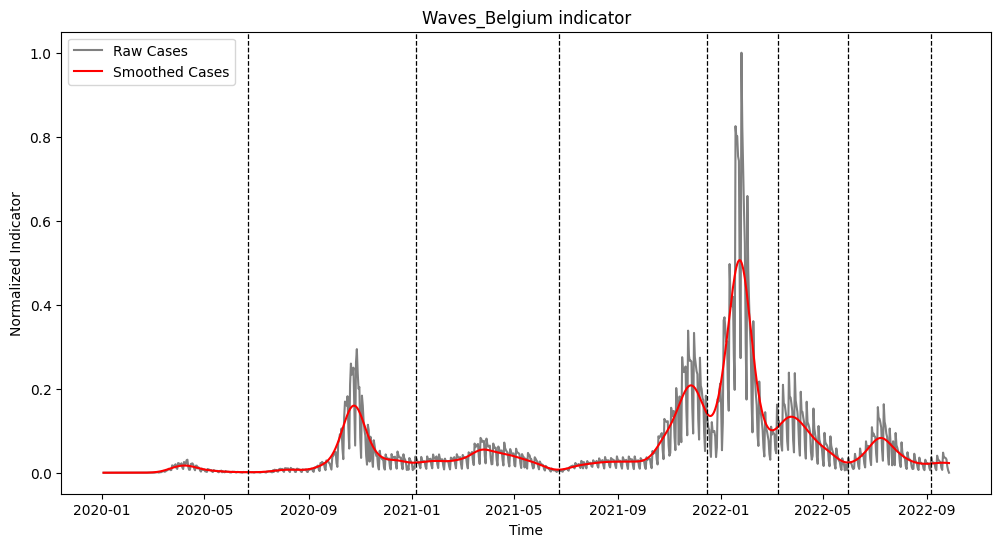

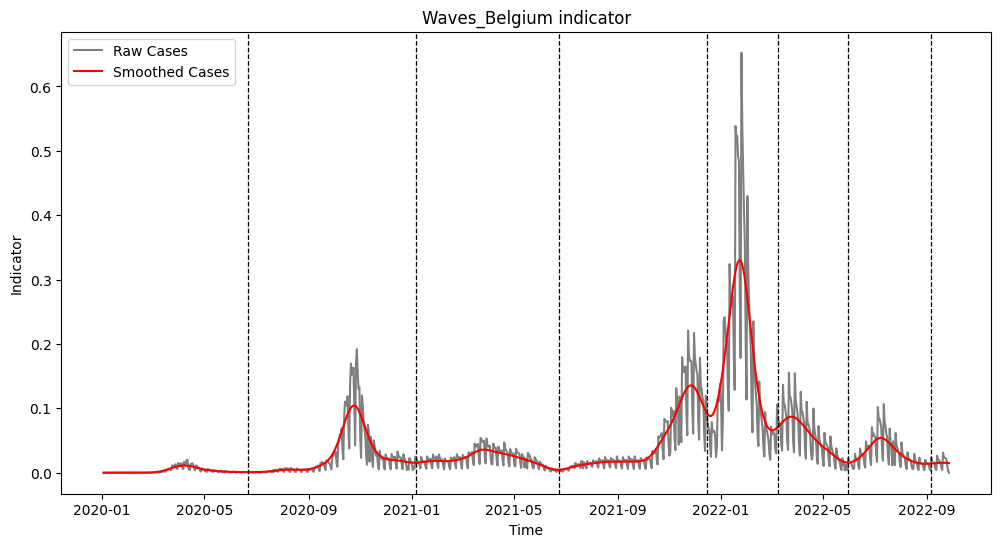

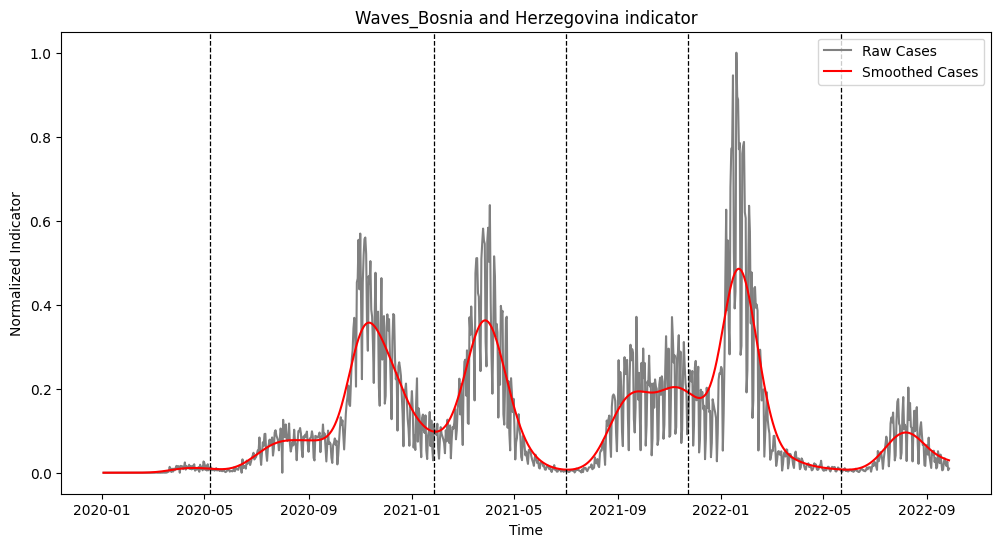

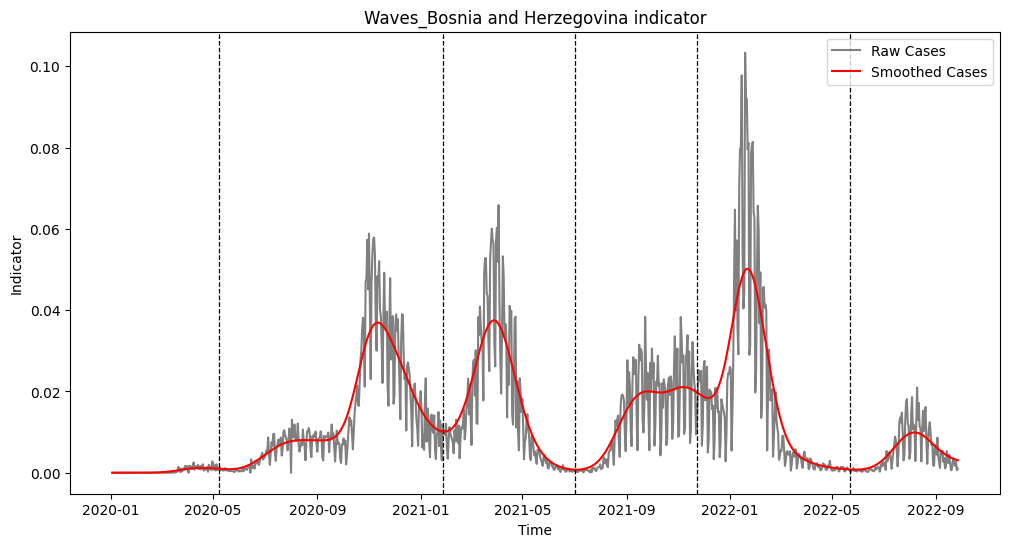

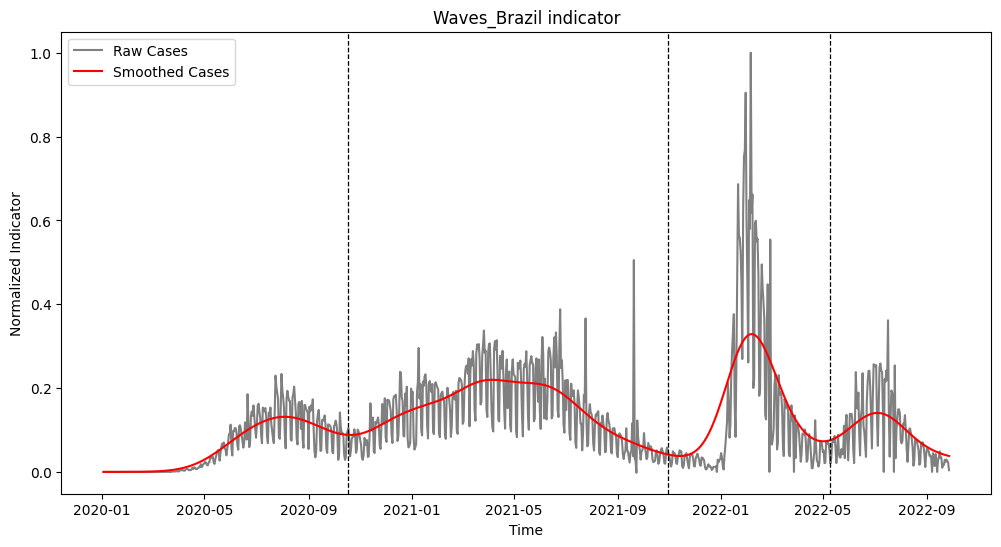

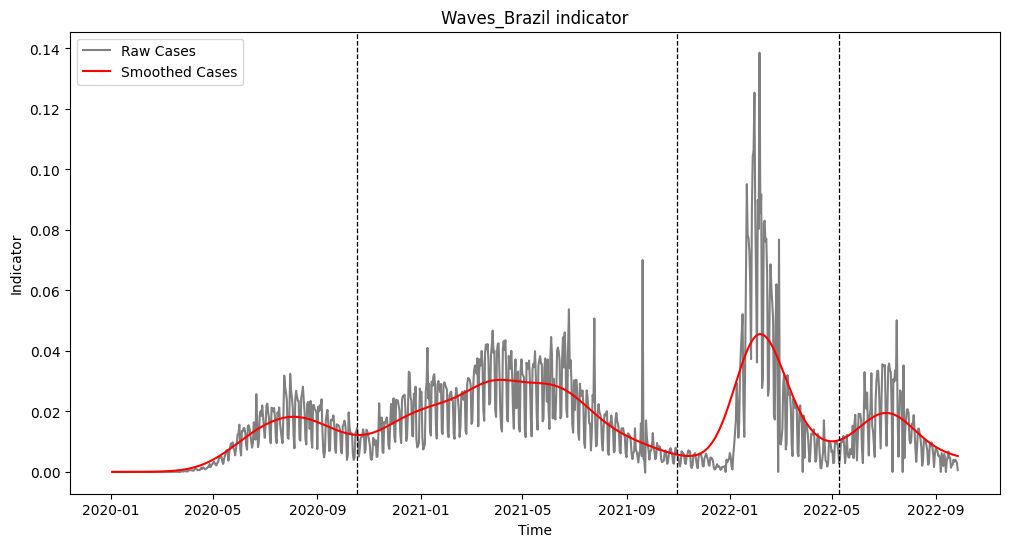

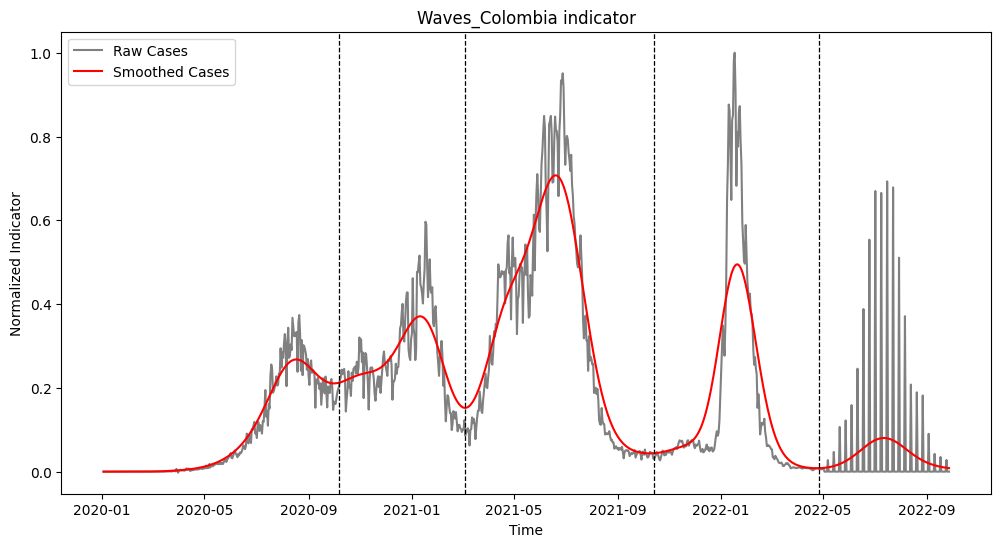

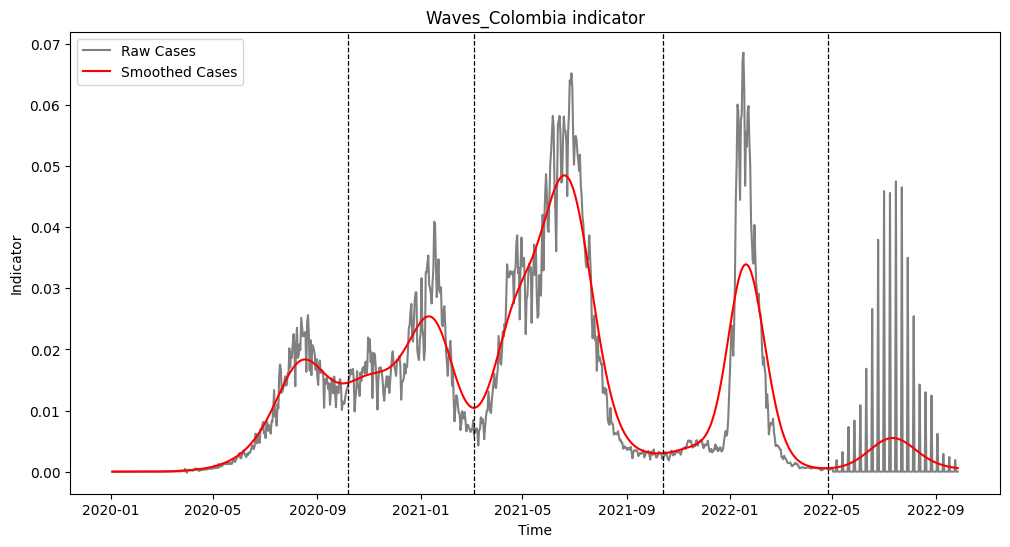

In [8]:
dataframe.groupby("Country").apply(lambda x : kabuWavesF(
    x[["Date_reported","Indicator"]],
    datesName,
    casesName,
    x["Country_code"].iloc[0],
    "Waves_"+ x["Country"].iloc[0]+" indicator",
    "Waves_"+ x["Country"].iloc[0]+" indicator"))

***3. Creating a database to estimate the size of the waves:***
1. sum: It counts the Indicator values since the start to the end of each wave
2. max: The maximum value inside the wave
3. long: The number of dates that a wave spans
NOTE: All these are estimated using the Smothed curve of the indicator not the raw data 

In [ ]:
sizeWavesDF = dataframe.groupby("Country").apply(lambda x : pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/dataframes/" + "Waves_"+ x["Country"].iloc[0]+" confi + indicator" + ".csv"))
sizeWavesDF

In [ ]:
len(dataframe)

In [ ]:
def group (name):
    d = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/dataframes/" + name + ".csv")
    d["Indicator"] = d["SmoothedCases"]
    d["waveNum"] = (d['cutDatesW'] == 1).cumsum()
    n = d.groupby("waveNum")['Indicator'].agg(["max","sum"]) 
    n["spanDays"] = d.groupby("waveNum")['Indicator'].agg("count")
    n["ratioSumSpan"] = n["sum"]/n["spanDays"]
    return n

In [ ]:
sizeWavesDF = dataframe.groupby("Country").apply(lambda x : group("Waves_"+ x["Country"].iloc[0]+" confi + indicator") )
sizeWavesDF.to_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/wavesSizes.csv")
sizeWavesDF